In [2]:
import pandas as pd
import numpy as np
import os

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [3]:
GCP_PROJECT = 'train-delays-406412'

BQ_DATASET = 'train_delays'

In [4]:
query = '''
SELECT * FROM `train-delays-406412.train_delays.train_delays_cleaned`
'''

In [5]:
from google.cloud import bigquery
from google.oauth2 import service_account
from pathlib import Path
#from params import *

def get_data_from_bq(
    gcp_project: 'train-delays-406412',
    query: str):
    client = bigquery.Client()
    query_job = client.query(query)
    result = query_job.result()
    df = result.to_dataframe()
    return df

In [6]:
df = get_data_from_bq(gcp_project=GCP_PROJECT, query=query)

RefreshError: ('invalid_grant: Invalid JWT: Token must be a short-lived token (60 minutes) and in a reasonable timeframe. Check your iat and exp values in the JWT claim.', {'error': 'invalid_grant', 'error_description': 'Invalid JWT: Token must be a short-lived token (60 minutes) and in a reasonable timeframe. Check your iat and exp values in the JWT claim.'})

In [26]:
!pwd

/home/ben/code/MathmoBen/TrainDelays


In [7]:
df_clean = pd.read_csv('/home/ben/code/MathmoBen/TrainDelays/clean_data.csv')

In [8]:
df_clean.head()

,TRAIN_SERVICE_CODE_AFFECTED,SERVICE_GROUP_CODE_AFFECTED,ENGLISH_DAY_TYPE,APP_TIMETABLE_FLAG_AFF,UNIT_CLASS_AFFECTED,INCIDENT_REASON,PERFORMANCE_EVENT_CODE,PFPI_MINUTES,Lat_OR,Lon_OR,...,ORIG_MINUTE_SIN,ORIG_MINUTE_COS,DEST_MONTH_SIN,DEST_MONTH_COS,DEST_DAY_SIN,DEST_DAY_COS,DEST_HOUR_SIN,DEST_HOUR_COS,DEST_MINUTE_SIN,DEST_MINUTE_COS
0,22214000,EK01,SA,Y,375.0,MD,M,9.0,51.54343,-0.02447,...,-1.000000,-1.836970e-16,0.951057,0.309017,7.431448e-01,0.669131,0.951057,0.309017,-0.978148,0.207912
1,22214000,EK01,WD,Y,378.0,MD,M,12.0,51.54343,-0.02447,...,-0.587785,-8.090170e-01,0.951057,0.309017,9.135455e-01,-0.406737,0.866025,0.500000,-0.809017,-0.587785
2,22214000,EK01,WD,Y,378.0,X8,M,8.0,51.54343,-0.02447,...,0.978148,-2.079117e-01,0.104528,0.994522,5.665539e-16,-1.000000,0.809017,-0.587785,0.913545,-0.406737
3,22214000,EK01,SA,Y,375.0,TG,M,10.0,51.54343,-0.02447,...,-0.309017,-9.510565e-01,0.913545,0.406737,5.877853e-01,-0.809017,0.913545,-0.406737,-0.207912,-0.978148
4,22214000,EK01,SA,Y,375.0,TG,M,11.0,51.54343,-0.02447,...,-0.669131,7.431448e-01,0.913545,0.406737,5.877853e-01,-0.809017,0.913545,-0.406737,-0.500000,0.866025


In [9]:
df_clean.columns

Index(['TRAIN_SERVICE_CODE_AFFECTED', 'SERVICE_GROUP_CODE_AFFECTED',
       'ENGLISH_DAY_TYPE', 'APP_TIMETABLE_FLAG_AFF', 'UNIT_CLASS_AFFECTED',
       'INCIDENT_REASON', 'PERFORMANCE_EVENT_CODE', 'PFPI_MINUTES', 'Lat_OR',
       'Lon_OR', 'Lat_DES', 'Lon_DES', 'ORIG_MONTH_SIN', 'ORIG_MONTH_COS',
       'ORIG_DAY_SIN', 'ORIG_DAY_COS', 'ORIG_HOUR_SIN', 'ORIG_HOUR_COS',
       'ORIG_MINUTE_SIN', 'ORIG_MINUTE_COS', 'DEST_MONTH_SIN',
       'DEST_MONTH_COS', 'DEST_DAY_SIN', 'DEST_DAY_COS', 'DEST_HOUR_SIN',
       'DEST_HOUR_COS', 'DEST_MINUTE_SIN', 'DEST_MINUTE_COS'],
      dtype='object')

In [10]:
import seaborn as sns

In [11]:
df_clean['PFPI_MINUTES'].max()

275.0

In [34]:
275 / 60.0

4.583333333333333

In [12]:
delay_lengths = pd.DataFrame(df_clean['PFPI_MINUTES'].value_counts())

In [13]:
delay_lengths.sort_values('1')

KeyError: '1'

<AxesSubplot:>

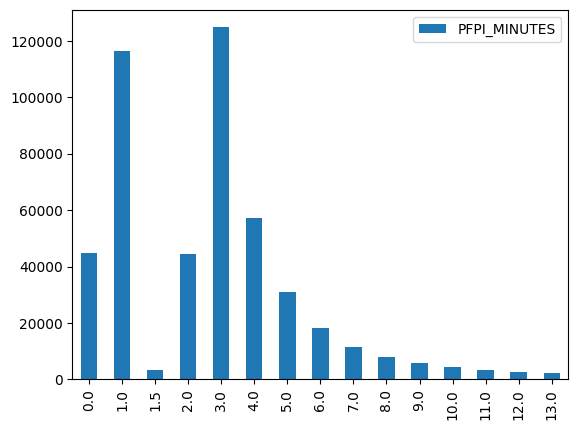

In [64]:
delay_lengths.head(15).sort_index().plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

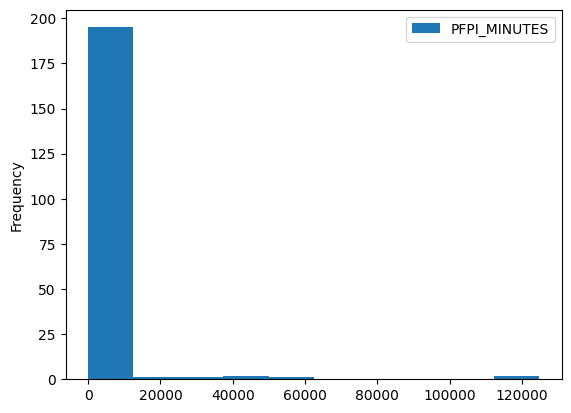

In [15]:
delay_lengths.plot.hist()

In [16]:
short_delays = delay_lengths.head()

In [17]:
type(short_delays)

pandas.core.frame.DataFrame

<AxesSubplot:ylabel='Frequency'>

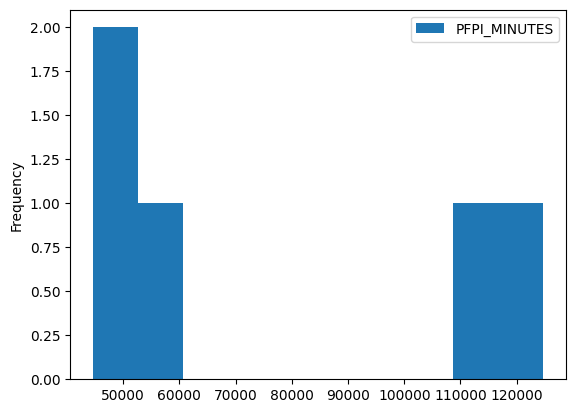

In [18]:
short_delays.plot.hist()

In [23]:
better_delays = pd.DataFrame([[0,44965],[1,116431],
                            [2,44565],
                            [3,124762],
                            [4,457166],
                            [5,30861],
                            [6,18235],
                            [7,11600],
                            [8,7919],
                            [9,5771],
                            [10,4350]])

<AxesSubplot:ylabel='Frequency'>

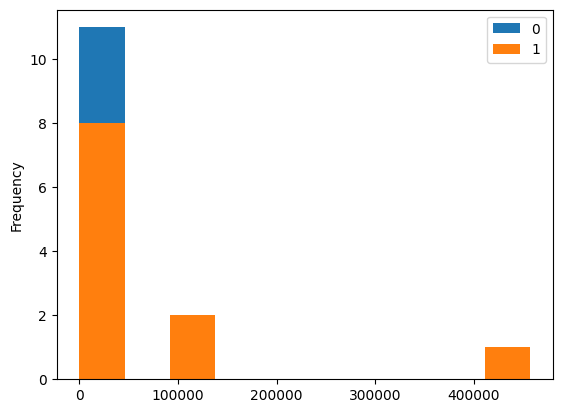

In [24]:
better_delays.plot.hist()

In [25]:
better_delays1 = pd.DataFrame([[44965,0],[116431,1],
                            [44565,2],
                            [124762,3],
                            [457166,4],
                            [30861,5],
                            [18235,6],
                            [11600,7],
                            [7919,8],
                            [5771,9],
                            [4350,10]])

<AxesSubplot:ylabel='Frequency'>

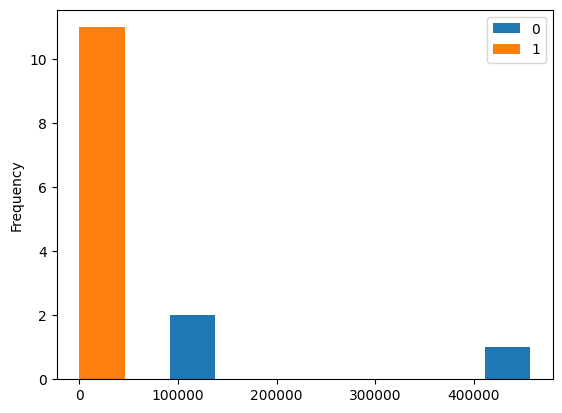

In [26]:
better_delays1.plot.hist()

In [28]:
df = df_clean

In [51]:
print(df.columns)

Index(['TRAIN_SERVICE_CODE_AFFECTED', 'SERVICE_GROUP_CODE_AFFECTED',
       'ENGLISH_DAY_TYPE', 'APP_TIMETABLE_FLAG_AFF', 'UNIT_CLASS_AFFECTED',
       'INCIDENT_REASON', 'PERFORMANCE_EVENT_CODE', 'PFPI_MINUTES', 'Lat_OR',
       'Lon_OR', 'Lat_DES', 'Lon_DES', 'ORIG_MONTH_SIN', 'ORIG_MONTH_COS',
       'ORIG_DAY_SIN', 'ORIG_DAY_COS', 'ORIG_HOUR_SIN', 'ORIG_HOUR_COS',
       'ORIG_MINUTE_SIN', 'ORIG_MINUTE_COS', 'DEST_MONTH_SIN',
       'DEST_MONTH_COS', 'DEST_DAY_SIN', 'DEST_DAY_COS', 'DEST_HOUR_SIN',
       'DEST_HOUR_COS', 'DEST_MINUTE_SIN', 'DEST_MINUTE_COS'],
      dtype='object')


In [34]:
df['ENGLISH_DAY_TYPE'].value_counts()

WD    407376
SA     44825
SU     35809
BH      5222
BD        19
Name: ENGLISH_DAY_TYPE, dtype: int64

In [2]:
import matplotlib.pyplot as plt

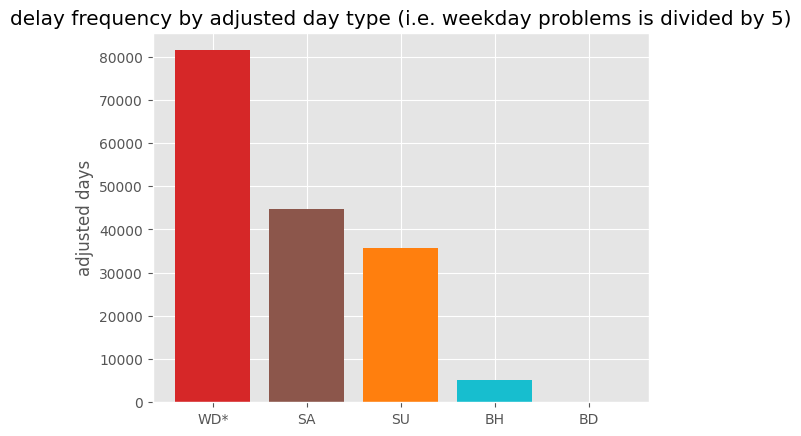

In [11]:
fig, ax = plt.subplots()

plt.style.use('ggplot')

days = ['WD*', 'SA', 'SU', 'BH', 'BD']
counts = [407376 / 5, 44825, 35809, 5222, 19]
bar_labels = ['red', 'brown', 'orange', 'cyan', 'purple']
bar_colors = ['tab:red', 'tab:brown', 'tab:orange', 'tab:cyan', 'tab:purple']

ax.bar(days, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('adjusted days')
ax.set_title('delay frequency by adjusted day type (i.e. weekday problems is divided by 5)')

#ax.legend(days)#,  title = 'Day type')

plt.show()

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [52]:
df['UNIT_CLASS_AFFECTED'].value_counts()

378.0    190366
375.0    124011
710.0    119354
315.0     29412
313.0     17385
317.0     12621
321.0       102
Name: UNIT_CLASS_AFFECTED, dtype: int64

<AxesSubplot:xlabel='Lon_OR', ylabel='Lat_OR'>

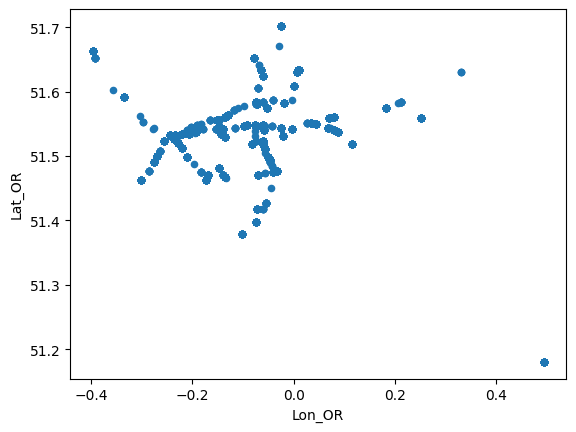

In [53]:
df.plot.scatter(x = 'Lon_OR', y = 'Lat_OR')

<AxesSubplot:xlabel='Lon_DES', ylabel='Lat_DES'>

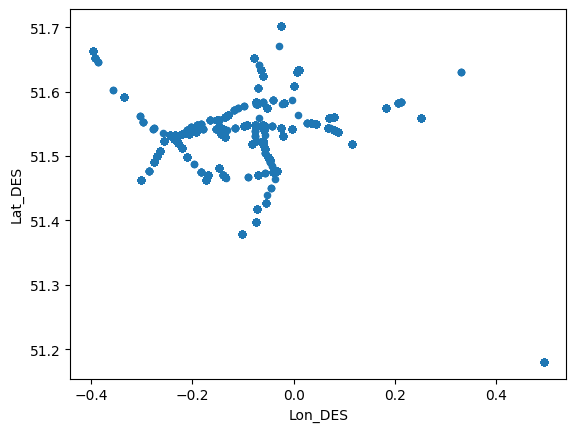

In [54]:
df.plot.scatter(x = 'Lon_DES', y = 'Lat_DES')

In [57]:
[df['Lon_DES'].max(),df['Lat_DES'].min()]

[0.49318, 51.18055]

In [65]:
df['Lat_DES'].max()

51.70193

In [69]:
sorted = df['Lon_DES'].sort_values()

In [70]:
set(sorted)

{-0.396493734,
 -0.391687928,
 -0.385298119,
 -0.357197341,
 -0.334548419,
 -0.303961346,
 -0.30059,
 -0.30056,
 -0.296395076,
 -0.285031,
 -0.27655,
 -0.275804927,
 -0.27553,
 -0.27019,
 -0.26291,
 -0.257643905,
 -0.25487,
 -0.24454,
 -0.24453,
 -0.2413,
 -0.24013,
 -0.23569,
 -0.23468,
 -0.2306,
 -0.22847,
 -0.22058,
 -0.22003,
 -0.21029,
 -0.21016,
 -0.20562,
 -0.20228372,
 -0.19565,
 -0.19221251,
 -0.191159392,
 -0.18336,
 -0.183115237,
 -0.17885249,
 -0.17253,
 -0.16936,
 -0.165679801,
 -0.15271,
 -0.15136,
 -0.14717,
 -0.146629699,
 -0.1466,
 -0.14356,
 -0.13932,
 -0.13928,
 -0.13858,
 -0.13592,
 -0.13522,
 -0.13495,
 -0.132496138,
 -0.13129,
 -0.12989,
 -0.117122773,
 -0.116703078,
 -0.10916,
 -0.102560169,
 -0.0988,
 -0.098118041,
 -0.09308,
 -0.092164332,
 -0.08964,
 -0.081399726,
 -0.07874,
 -0.0761,
 -0.075654844,
 -0.075639719,
 -0.075219638,
 -0.075195755,
 -0.07513,
 -0.07507,
 -0.072583817,
 -0.07182,
 -0.070888494,
 -0.06984,
 -0.06919476,
 -0.068240632,
 -0.06491,
 -0.

/home/ben/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 100.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ben/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ben/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ben/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warning

KeyboardInterrupt: 

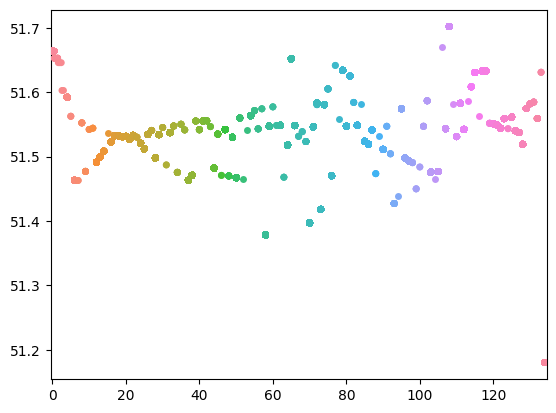

In [72]:
d = sns.swarmplot(x = df['Lon_DES'], y = df['Lat_DES'], data = df)

In [ ]:
sns.plot(d)